# Thiago Schuck October 18 2023
## Purpose: To explore and clean data using pandas
### This program will take data from a dataset produce a new cleaned dataset with pie charts

In [19]:
# Import pandas
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
pd.__version__

# Read in the data and save as variable
try:
    csLiteracy_df = pd.read_csv('CCMComputingLiteracyCourseEntrySurvey-Fall2022.csv')

    # Tell user file successfully read
    print("File successfully read")
except:
    # Tell user file not found
    print("File not found")

File successfully read


In [20]:
# Print the data from literacy survey
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
csLiteracy_df.head(20)

,Timestamp,Which course are you currently enrolled in?,How did you hear about County College of Morris? [CCM Web site],How did you hear about County College of Morris? [Social Media],How did you hear about County College of Morris? [Community Event],How did you hear about County College of Morris? [Family member or friend],How did you hear about County College of Morris? [Current CCM student],How did you hear about County College of Morris? [CCM Alumni],How did you hear about County College of Morris? [High School Teacher],How did you hear about County College of Morris? [High School Counselor],How did you hear about County College of Morris? [In-app advertisement],How did you hear about County College of Morris? [Employer],How did you hear about County College of Morris? [Billboard],How did you hear about County College of Morris? [Television],How did you hear about County College of Morris? [Radio],How did you hear about County College of Morris? [Home mailer],How did you hear about County College of Morris? [Other],To what extent did the following impact your decision to attend County College of Morris? [Affordable cost],To what extent did the following impact your decision to attend County College of Morris? [Location/convenience],To what extent did the following impact your decision to attend County College of Morris? [Choice of programs],To what extent did the following impact your decision to attend County College of Morris? [Online offerings],To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral],To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff],To what extent did the following impact your decision to attend County College of Morris? [College reputation],To what extent did the following impact your decision to attend County College of Morris? [Financial Aid],To what extent did the following impact your decision to attend County College of Morris? [Scholarships],To what extent did the following impact your decision to attend County College of Morris? [Small class sizes],To what extent did the following impact your decision to attend County College of Morris? [Extra-curricular opportunities],To what extent did the following impact your decision to attend County College of Morris? [Accepted my transfer credits],To what extent did the following impact your decision to attend County College of Morris? [Negative experience at another college],To what extent did the following impact your decision to attend County College of Morris? [NJ Stars Program],To what extent did the following impact your decision to attend County College of Morris? [Ability to transfer CCM credits to a 4-year school],To what extent did the following impact your decision to attend County College of Morris? [Get college credit while in high school],"Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]","Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]","Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]","Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Titans Tuesday (Virtual) Information Session]","Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]","

# Clean data from surveys
### Combine and add how did you find out about CCM question add to clean dataframe
### Combine and add why people chose to attend CCM and add to clean dataframe
### Add ages of people that took survey to dataframe
### Add interest in taking another computer science class of people that took survey to dataframe 
### Combine and add what motivated students to take a computing class to dataframe

In [21]:
# Create new cleaned dataset
cleaned_df = pd.DataFrame()

# Remove NaN from old datasets
csLiteracy_df = csLiteracy_df.dropna()

## Combine How did you hear about CCM question

In [22]:
# List of columns with targeted questions
columns_to_combine = []

# Loop through and add column index to columns to combine list if the question matches
for  col in csLiteracy_df.columns:

    if col.startswith("How did you hear about County College of Morris?"):
        columns_to_combine.append(csLiteracy_df.columns.get_loc(col))

# Create responses list     
combined_responses = []

# Fill combined responses list
for i, row in csLiteracy_df.iterrows():
    responses = []      # Responses of single participant

    # Loop through each class in row
    for col in columns_to_combine:
        response = row.iloc[col]
        varClass = ' '.join(re.findall(r'\[([^]]*)\]', csLiteracy_df.columns[col]))

        if response == "Yes":       # If participant heard about CCM in specified column way add to responses list
            responses.append(varClass)

    # Indicate if participant did not hear about CCM in any specified column way
    if len(responses) == 0:
        responses.append("Other")

    combined_responses.append(", ".join(responses))

# Create new How did you hear about County College of Morris? column with responses list as answers in new data set
cleaned_df["How did you hear about CCM?"] = combined_responses
pd.set_option('display.max_columns', None)
cleaned_df.head()

,How did you hear about CCM?
0,"Family member or friend, High School Counselor"
1,Other
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor"
3,"Family member or friend, Current CCM student, Other"
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor"


## Combine To what extend did the following impact your decision to attend CCM question

In [23]:
# Clear list of columns with targeted questions
columns_to_combine = []

# Loop through and add column index to columns to combine list if the question matches
for  col in csLiteracy_df.columns:

    if col.startswith("To what extent did the following impact your decision to attend County College of Morris?"):
        columns_to_combine.append(csLiteracy_df.columns.get_loc(col))

# Clear combined responses list     
combined_responses = []

# Fill combined responses list
for i, row in csLiteracy_df.iterrows():
    responses = {}      # Responses of single participant
    response = ""
    # Lists to hold classes with different impact levels
    highImpact = []
    someImpact = []
    noImpact = []

    # Loop through each class in row
    for col in columns_to_combine:
        response = row.iloc[col]
        varClass = ' '.join(re.findall(r'\[([^]]*)\]', csLiteracy_df.columns[col]))

        # Classify responses by impact levels
        if response == "High Impact":
            highImpact.append(varClass)
        elif response == "Some Impact":
            someImpact.append(varClass)
        else:
            noImpact.append(varClass)

        # Add classified responses to responses
        responses["High Impact"] = highImpact
        responses["Some Impact"] = someImpact
        responses["No Impact"] = noImpact

    # Add responses to combined response list
    combined_responses.append(responses)

# Create new What impacted your decision to attend CCM? column in cleaned dataset with responses list as answers
cleaned_df["What impacted your decision to attend CCM?"] = combined_responses
cleaned_df.head()

,How did you hear about CCM?,What impacted your decision to attend CCM?
0,"Family member or friend, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience'], 'Some Impact': ['Choice of programs', 'Online offerings', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}"
1,Other,"{'High Impact': [], 'Some Impact': [], 'No Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school']}"
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Financial Aid'], 'Some Impact': ['Choice of programs', 'College reputation', 'Scholarships', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Small class sizes', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}"
3,"Family member or friend, Current CCM student, Other","{'High Impact': ['Location/convenience'], 'Some Impact': ['Affordable cost', 'Choice of programs', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Small class sizes', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Online offerings', 'Financial Aid', 'Scholarships', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}"
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Family/friend referral', 'Financial Aid', 'Small class sizes', 'Accepted my transfer credits', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': ['Choice of programs', 'Faculty/staff', 'College reputation', 'Scholarships'], 'No Impact': ['Extra-curricular opportunities', 'Negative experience at another college', 'NJ Stars Program']}"


## Add ages of people that took the survey

In [24]:
# List to hold ages of participants
ages = []

# Get ages of survey participants
for i, row in csLiteracy_df.iterrows():
    ages.append(row.iloc[-1])

# Create new Age column in cleaned dataset
cleaned_df["Ages"] = ages
cleaned_df.head()

,How did you hear about CCM?,What impacted your decision to attend CCM?,Ages
0,"Family member or friend, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience'], 'Some Impact': ['Choice of programs', 'Online offerings', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",18 and younger
1,Other,"{'High Impact': [], 'Some Impact': [], 'No Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school']}",21-24
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Financial Aid'], 'Some Impact': ['Choice of programs', 'College reputation', 'Scholarships', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Small class sizes', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20
3,"Family member or friend, Current CCM student, Other","{'High Impact': ['Location/convenience'], 'Some Impact': ['Affordable cost', 'Choice of programs', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Small class sizes', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Online offerings', 'Financial Aid', 'Scholarships', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Family/friend referral', 'Financial Aid', 'Small class sizes', 'Accepted my transfer credits', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': ['Choice of programs', 'Faculty/staff', 'College reputation', 'Scholarships'], 'No Impact': ['Extra-curricular opportunities', 'Negative experience at another college', 'NJ Stars Program']}",18 and younger


## Add interest in taking another computer science class of people that took survey to dataframe

In [25]:
# List to hold interest values
interest = []

# Get interest of survey participants
for i, row in csLiteracy_df.iterrows():
    interest.append(row.iloc[84])     # Get value at interest column and save to interest list

# Create new interest column in cleaned dataset
cleaned_df["Interest in taking another class"] = interest
cleaned_df.head(10)

,How did you hear about CCM?,What impacted your decision to attend CCM?,Ages,Interest in taking another class
0,"Family member or friend, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience'], 'Some Impact': ['Choice of programs', 'Online offerings', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",18 and younger,3
1,Other,"{'High Impact': [], 'Some Impact': [], 'No Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school']}",21-24,3
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Financial Aid'], 'Some Impact': ['Choice of programs', 'College reputation', 'Scholarships', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Small class sizes', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,4
3,"Family member or friend, Current CCM student, Other","{'High Impact': ['Location/convenience'], 'Some Impact': ['Affordable cost', 'Choice of programs', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Small class sizes', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Online offerings', 'Financial Aid', 'Scholarships', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,3
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Family/friend referral', 'Financial Aid', 'Small class sizes', 'Accepted my transfer credits', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': ['Choice of programs', 'Faculty/staff', 'College reputation', 'Scholarships'], 'No Impact': ['Extra-curricular opportunities', 'Negative experience at another college', 'NJ Stars Program']}",18 and younger,1
5,"CCM Web site, Current CCM student","{'High Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': [], 'No Impact': []}",25-34,4
6,Other,"{'High Impact': [], 'Some Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'No Impact': []}",25-34,4
7,"Family member or friend, High School Counselor","{'High Impact': ['A

## Add classes participants are interested in to dataframe

In [26]:
# Clear list of columns with targeted questions
columns_to_combine = []

# Loop through and add column index to columns to combine list if the question matches
for  col in csLiteracy_df.columns:

    if col.startswith("If you answered that you were interested in taking more computing classes, which ones interest you most?"):
        columns_to_combine.append(csLiteracy_df.columns.get_loc(col))

# Clear combined responses list 
combined_responses = []

# Fill combined responses list
for i, row in csLiteracy_df.iterrows():
    responses = []      # Responses of single participant

    for col in columns_to_combine:
        response = row.iloc[col]

        if response == "Yes":       # If participant is interested in taking class add to responses list
            responses.append(' '.join(re.findall(r'\[([^]]*)\]', csLiteracy_df.columns[col])))

    # Indicate if participant is not interested in any classes            
    if len(responses) == 0:
        responses.append("No interested classes")

    combined_responses.append(", ".join(responses))

#Create new interested classes column in cleaned data set
cleaned_df["Interested Classes"] = combined_responses
cleaned_df.head()

,How did you hear about CCM?,What impacted your decision to attend CCM?,Ages,Interest in taking another class,Interested Classes
0,"Family member or friend, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience'], 'Some Impact': ['Choice of programs', 'Online offerings', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",18 and younger,3,"CyberSecurity, App Development, Computer Programming"
1,Other,"{'High Impact': [], 'Some Impact': [], 'No Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school']}",21-24,3,No interested classes
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Financial Aid'], 'Some Impact': ['Choice of programs', 'College reputation', 'Scholarships', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Small class sizes', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,4,"Web Development, Computer Programming, Game Design, Hardware Installation & Repair"
3,"Family member or friend, Current CCM student, Other","{'High Impact': ['Location/convenience'], 'Some Impact': ['Affordable cost', 'Choice of programs', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Small class sizes', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Online offerings', 'Financial Aid', 'Scholarships', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,3,"Web Development, Machine Learning/Artificial Intelligence, Computer Programming"
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Family/friend referral', 'Financial Aid', 'Small class sizes', 'Accepted my transfer credits', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': ['Choice of programs', 'Faculty/staff', 'College reputation', 'Scholarships'], 'No Impact': ['Extra-curricular opportunities', 'Negative experience at another college', 'NJ Stars Program']}",18 and younger,1,No interested classes


## Combine and add what motivated students to take a computing class to dataframe

In [27]:
# Clear list of columns with targeted questions
columns_to_combine = []

# Loop through and add column index to columns to combine list if the question matches
for  col in csLiteracy_df.columns:

    if col.startswith("What motivated you to seek a computing class at CCM?"):
        columns_to_combine.append(csLiteracy_df.columns.get_loc(col))

# Clear combined responses list
combined_responses = []

# Fill combined responses list
for i, row in csLiteracy_df.iterrows():
    responses = []      # Responses of single participant

    for col in columns_to_combine:
        response = row.iloc[col]

        if response == "Yes":       # If participant answered yes, add what motivated them to responses list
            responses.append(' '.join(re.findall(r'\[([^]]*)\]', csLiteracy_df.columns[col])))
    
    if len(responses) == 0:         # Indicate if participant was not motivated by anything asked in survey
        responses.append("Other")
    
    combined_responses .append(", ".join(responses))

# Add new what motivated you column in cleaned dataset
cleaned_df["What motivated you to seek a computing class at CCM"] = combined_responses
cleaned_df.head()

,How did you hear about CCM?,What impacted your decision to attend CCM?,Ages,Interest in taking another class,Interested Classes,What motivated you to seek a computing class at CCM
0,"Family member or friend, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience'], 'Some Impact': ['Choice of programs', 'Online offerings', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",18 and younger,3,"CyberSecurity, App Development, Computer Programming","Curiosity, Personal Enrichment, Career Advancement, Career Change, Professional Development, It’s a required class for the degree I’m seeking"
1,Other,"{'High Impact': [], 'Some Impact': [], 'No Impact': ['Affordable cost', 'Location/convenience', 'Choice of programs', 'Online offerings', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Financial Aid', 'Scholarships', 'Small class sizes', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school']}",21-24,3,No interested classes,It’s a required class for the degree I’m seeking
2,"Family member or friend, CCM Alumni, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Financial Aid'], 'Some Impact': ['Choice of programs', 'College reputation', 'Scholarships', 'Extra-curricular opportunities', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Family/friend referral', 'Faculty/staff', 'Small class sizes', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,4,"Web Development, Computer Programming, Game Design, Hardware Installation & Repair","To keep current in computing skills, Personal Enrichment, Career Advancement, It’s a required class for the degree I’m seeking"
3,"Family member or friend, Current CCM student, Other","{'High Impact': ['Location/convenience'], 'Some Impact': ['Affordable cost', 'Choice of programs', 'Family/friend referral', 'Faculty/staff', 'College reputation', 'Small class sizes', 'Ability to transfer CCM credits to a 4-year school'], 'No Impact': ['Online offerings', 'Financial Aid', 'Scholarships', 'Extra-curricular opportunities', 'Accepted my transfer credits', 'Negative experience at another college', 'NJ Stars Program', 'Get college credit while in high school']}",19-20,3,"Web Development, Machine Learning/Artificial Intelligence, Computer Programming",Other
4,"CCM Web site, Social Media, Family member or friend, Current CCM student, High School Teacher, High School Counselor","{'High Impact': ['Affordable cost', 'Location/convenience', 'Online offerings', 'Family/friend referral', 'Financial Aid', 'Small class sizes', 'Accepted my transfer credits', 'Ability to transfer CCM credits to a 4-year school', 'Get college credit while in high school'], 'Some Impact': ['Choice of programs', 'Faculty/staff', 'College reputation', 'Scholarships'], 'No Impact': ['Extra-curricular opportunities', 'Negative experience at another college', 'NJ Stars Program']}",18 and younger,1,No interested classes,It’s a required class for the degree I’m seeking


# Create pie charts

## Create pie chart of how people heard about CCM

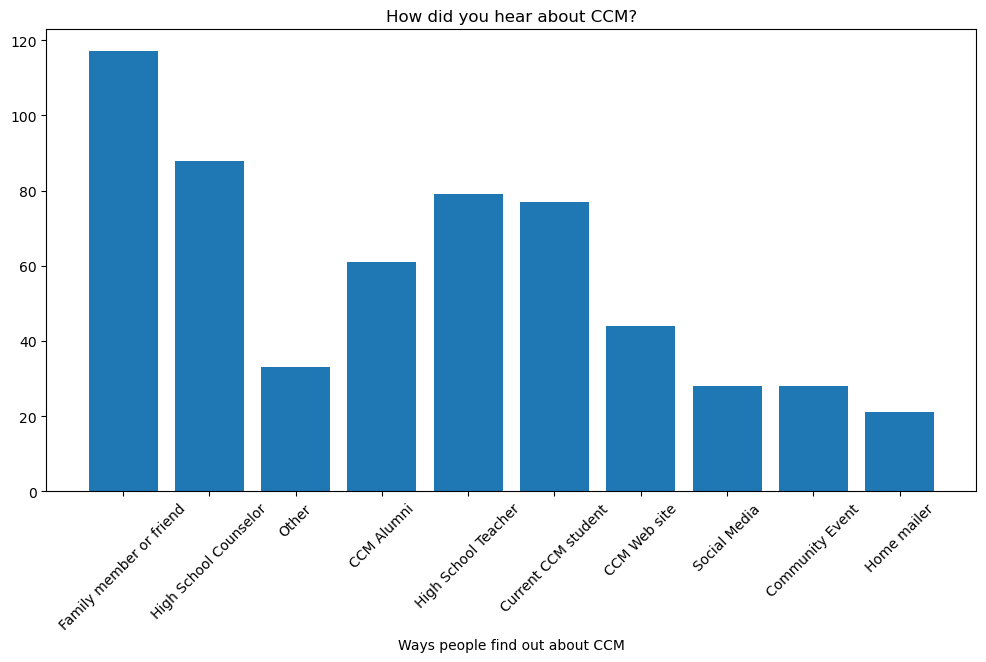

In [50]:
# Create dictionary of how people heard about CCM
counts = {}

# Loop through each row and add count ways people heard about CCM
for i, row in cleaned_df.iterrows():
    for response in row["How did you hear about CCM?"].split(", "):
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1

# Create int of total responses
totalResponses = 0
for response in counts:
    totalResponses += counts[response]

# Create "other" in counts
counts["Other"] = 0

# Create list of responses to remove
remove = []

# Loop through each response in counts to clean up any response with less than 3%
for response in counts:
    
    # Check if response does not have enough responses
    if counts[response] < (3/100 * totalResponses) and response != "Other":
        
        # Add response count to "other" category and add response to remove list
        counts["Other"] += counts[response]
        remove.append(response)
        
# Remove responses
for response in remove:
    del counts[response]

# Create pie chart of how people heard about CCM
findOut = plt.figure(figsize=(12,6))
findOut = plt.bar(counts.keys(), counts.values())
findOut = plt.xlabel("Ways people find out about CCM")
findOut = plt.title("How did you hear about CCM?")
findOut = plt.xticks(rotation = 45)
findOut = plt.show()

## Create pie chart of what impacted people's decision to attend CCM

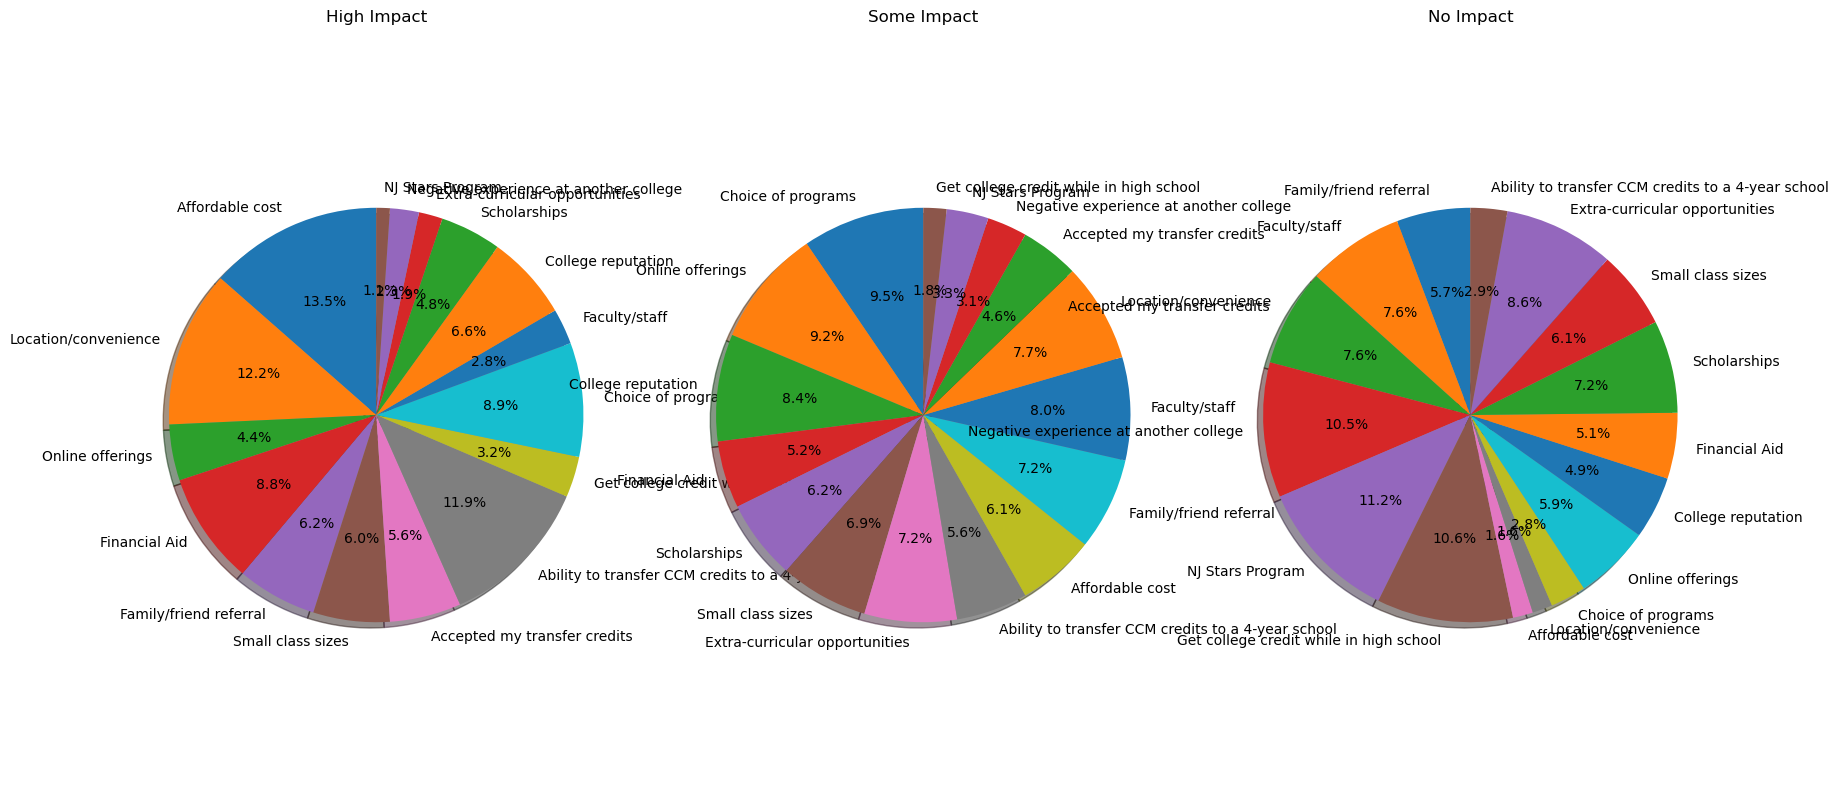

In [51]:
# Create dictionaries of what impacted people's decision to attend CCM based on impact level
countsHighImpact = {}
countsSomeImpact = {}
countsNoImpact = {}

# Loop through each row and add count ways people's decision to attend CCM
for i, row in cleaned_df.iterrows():

    # Loop through each response in each impact level and add to count
    # High Impact
    for response in row["What impacted your decision to attend CCM?"]["High Impact"]:

        if response in countsHighImpact:
            countsHighImpact[response] += 1

        else:
            countsHighImpact[response] = 1

    # Some Impact
    for response in row["What impacted your decision to attend CCM?"]["Some Impact"]:
        
        if response in countsSomeImpact:
            countsSomeImpact[response] += 1
        
        else:
            countsSomeImpact[response] = 1
    
    # No Impact
    for response in row["What impacted your decision to attend CCM?"]["No Impact"]:

        if response in countsNoImpact:
            countsNoImpact[response] += 1

        else:
            countsNoImpact[response] = 1

# Create pie chart with 3 subplots of what impacted people's decision to attend CCM based on impact level
decisionImpact = plt.figure(figsize=(20, 10))

# High Impact
highChart = decisionImpact.add_subplot(1, 3, 1)
highChart = plt.pie(countsHighImpact.values(), labels=countsHighImpact.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
highChart = plt.title("High Impact")
highChart = plt.axis('equal')

# Some Impact
someChart = decisionImpact.add_subplot(1, 3, 2)
someChart = plt.pie(countsSomeImpact.values(), labels=countsSomeImpact.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
someChart = plt.title("Some Impact")
someChart = plt.axis('equal')

# No Impact
noChart = decisionImpact.add_subplot(1, 3, 3)
noChart = plt.pie(countsNoImpact.values(), labels=countsNoImpact.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
noChart = plt.title("No Impact")
noChart = plt.axis('equal')

# Show pie charts
decisionImpact = plt.show()

## Create pie chart of ages of people that took the survey

In [ ]:
# Create dictionary of ages of people that took the survey
counts = {}

# Loop through each row and add count of ages
for i, row in cleaned_df.iterrows():
    age = row["Ages"]

    if age in counts:
        counts[age] += 1
    else:
        counts[age] = 1

# Create pie chart of ages of people that took the survey
agesChart = plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
agesChart = plt.title("Ages")
agesChart = plt.axis('equal')
agesChart = plt.show()

## Create pie chart of interest in taking another computer science class of people that took survey

In [ ]:
# Create dictionary of interest in taking another computer science class of people that took survey
counts = {}

# Loop through each row and add count of interest
for i, row in cleaned_df.iterrows():
    interest = row["Interest in taking another class"]

    if interest in counts:
        counts[interest] += 1
    else:
        counts[interest] = 1

# Create pie chart of participants' interest in taking another computer science class
interestChart = plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
interestChart = plt.title("Interest in taking another class")
interestChart = plt.axis('equal')
interestChart = plt.show()

## Create pie chart of classes participants are interested in

In [ ]:
# Create dictionary of classes participants are interested in
counts = {}

# Loop through each row and add count of classes participants are interested in
for i, row in cleaned_df.iterrows():

    for response in row["Interested Classes"].split(", "):

        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1

# Create pie chart of classes participants are interested in
classInterestChart = plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
classInterestChart = plt.title("Interested Classes")
classInterestChart = plt.axis('equal')
classInterestChart = plt.show()